In [41]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


In [42]:

df = pd.read_csv("hospital_data.csv")  
df.head()


,age,sex,bp,chol,fbs,restecg,exng,temperature,o2,hr,output
0,23.0,1,131.0,160.0,85,0,1,37.94,100.0,61.0,0
1,23.0,1,121.0,160.0,85,0,1,38.12,98.0,66.0,0
2,23.0,1,132.0,160.0,85,0,1,36.49,99.0,69.0,0
3,23.0,1,126.0,160.0,85,0,1,37.83,100.0,71.0,0
4,23.0,1,131.0,160.0,85,0,1,36.38,94.0,71.0,0


In [43]:

feature_cols = ["age", "sex", "bp", "chol", "fbs", "restecg", "exng", "temperature", "o2", "hr"]
X = df[feature_cols]
y = df["output"]


In [44]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [45]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(" Training Accuracy:", accuracy_score(y_train, y_train_pred))
print(" Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


 Training Accuracy: 1.0
 Testing Accuracy: 1.0

 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3156
           1       1.00      1.00      1.00      1844

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



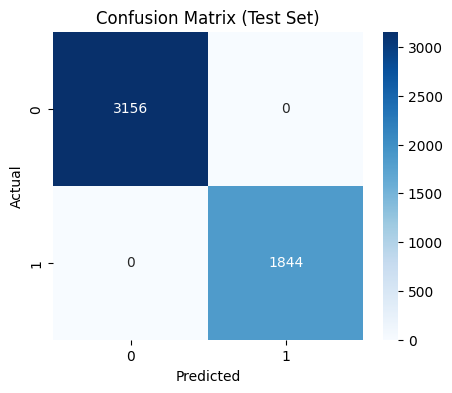

In [47]:

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


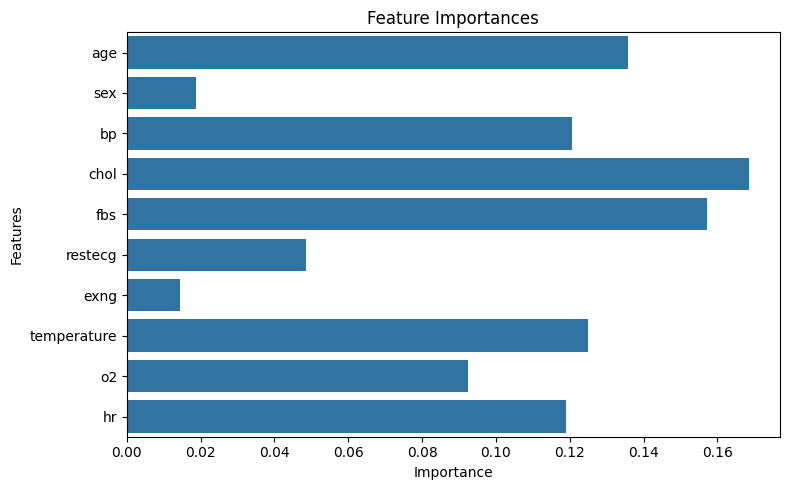

In [48]:

importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_cols)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [49]:

joblib.dump(model, "medical_rf_model.pkl")
print(" Model saved as 'medical_rf_model.pkl'")


 Model saved as 'medical_rf_model.pkl'


In [ ]:

new_data = pd.DataFrame([{
    "age": 23,
    "sex": 1,
    "bp": 128,
    "chol": 160,
    "fbs": 85,
    "restecg": 0,
    "exng": 1,
    "temperature": 37.5,
    "o2": 98,
    "hr": 67
}])

prediction = model.predict(new_data)[0]
print(" Prediction:", "High Risk" if prediction == 1 else "Normal")


 Prediction: Normal
